In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [206]:
url = 'https://raw.githubusercontent.com/Propsih/test/main/data_test.csv'
df = pd.read_csv(url, delimiter = ';')
df["VALUE_DAY"] = pd.to_datetime(df['VALUE_DAY'])

In [207]:
df.loc[df.sort_values("VALUE_DAY").
groupby("CLIENT_ID").
apply(lambda x: x.index[0]), "mark"] = '1'
df1 = df[df['mark'] == '1'][['CLIENT_ID', 'VALUE_DAY']].rename(columns={'VALUE_DAY' : 'FIRST_DAY'})
df1 = df.merge(df1, how = 'left', on = 'CLIENT_ID').drop(columns = ['mark'])

Когортами будем считать людей, запись по которым у нас есть в CSV в тот или иной день. Построим визуальное представление удержания клиентов в статусе:

In [208]:
df1 = df1.fillna(0)
df1["active_flg"] = 1
df1["dig_flg"] = 0 
df1["oper_flg"] = 0 
df1["tnx_flg"] = 0

df1.loc[df1["DIGITAL_30_CNT"] != 0,["dig_flg"]] = 1
df1.loc[df1["TRAN_ACTIVE_30_CNT"] != 0,["tnx_flg"]] = 1
df1.loc[df1["OPER_ACTIVE_30_CNT"] != 0,["oper_flg"]] = 1


1) активных клиентов банка (наличие строки для клиента на отчетную дату)

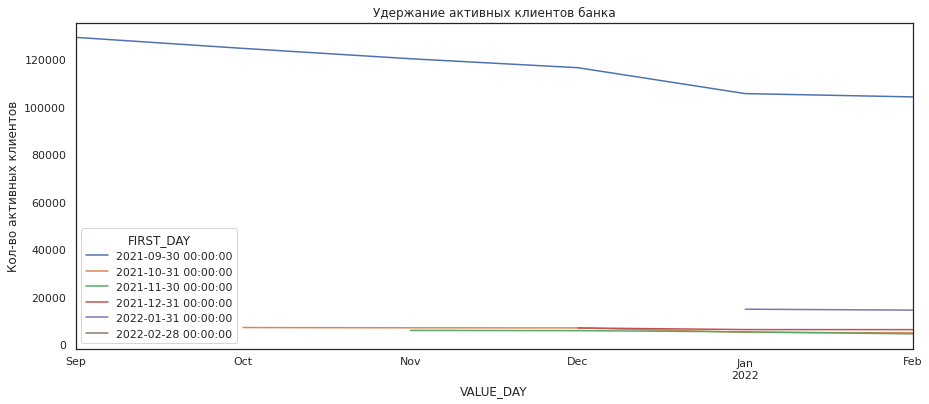

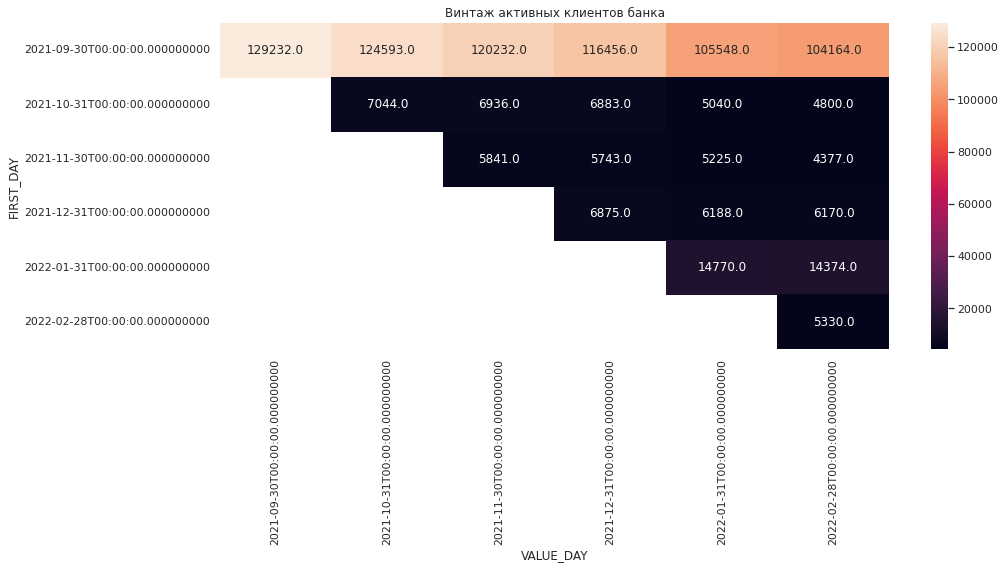

In [209]:
df_active = df1[['FIRST_DAY', 'VALUE_DAY', 'active_flg']]

cohort_pivot_active = df_active.pivot_table(index = 'VALUE_DAY',
                                     columns = 'FIRST_DAY',
                                     values = 'active_flg', aggfunc = 'sum')
cohort_pivot_active.plot(figsize=(15, 6))
plt.title('Удержание активных клиентов банка')
plt.ylabel('Кол-во активных клиентов');

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Винтаж активных клиентов банка')
sns.heatmap(cohort_pivot_active.T, mask=cohort_pivot_active.T.isnull(), annot=True, fmt='0');

2) диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа)

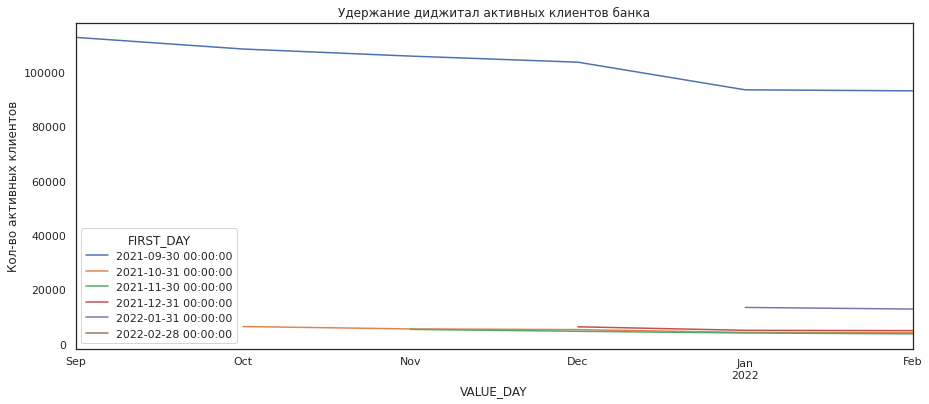

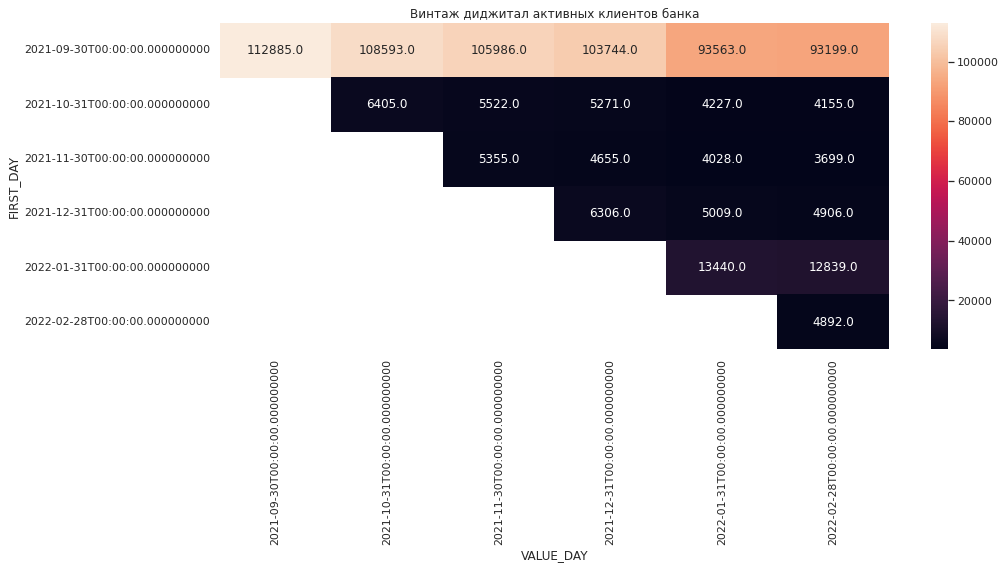

In [210]:
df_dig = df1[['FIRST_DAY', 'VALUE_DAY', 'dig_flg']]

cohort_pivot_dig = df_dig.pivot_table(index = 'VALUE_DAY',
                                     columns = 'FIRST_DAY',
                                     values = 'dig_flg', aggfunc = 'sum')

cohort_pivot_dig.plot(figsize=(15, 6))
plt.title('Удержание диджитал активных клиентов банка')
plt.ylabel('Кол-во активных клиентов');

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Винтаж диджитал активных клиентов банка')
sns.heatmap(cohort_pivot_dig.T, mask=cohort_pivot_dig.T.isnull(), annot=True, fmt='0');

3) операционно активных

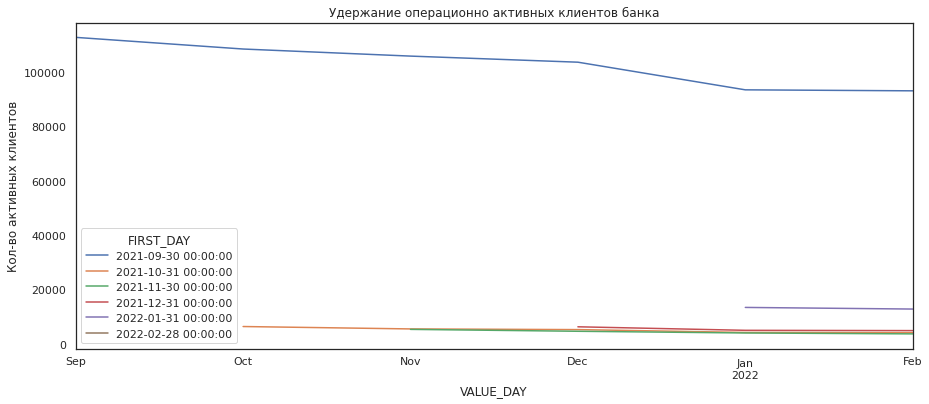

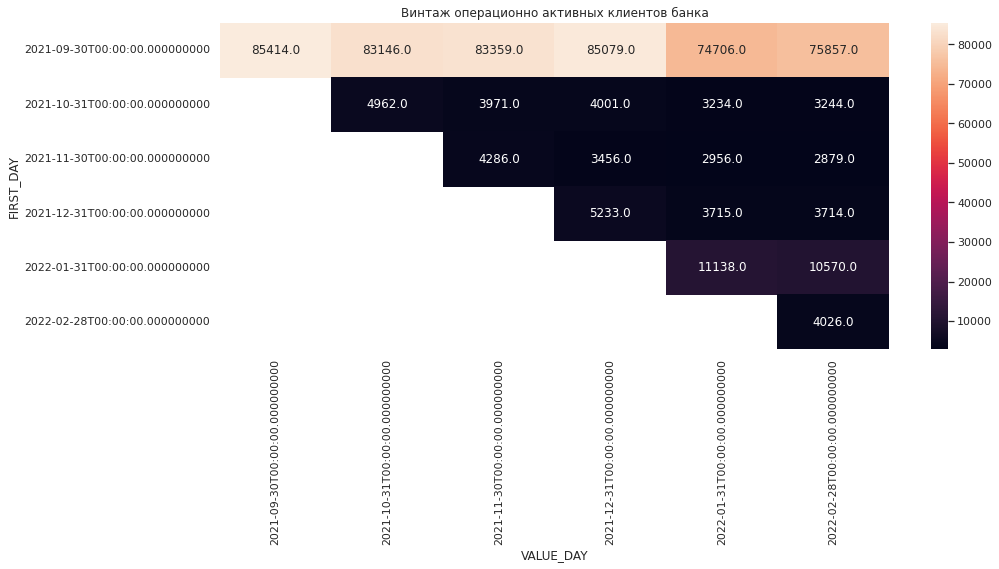

In [211]:
df_oper = df1[['FIRST_DAY', 'VALUE_DAY', 'oper_flg']]

cohort_pivot_oper = df_oper.pivot_table(index = 'VALUE_DAY',
                                     columns = 'FIRST_DAY',
                                     values = 'oper_flg', aggfunc = 'sum')

cohort_pivot_dig.plot(figsize=(15, 6))
plt.title('Удержание операционно активных клиентов банка')
plt.ylabel('Кол-во активных клиентов');

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Винтаж операционно активных клиентов банка')
sns.heatmap(cohort_pivot_oper.T, mask=cohort_pivot_oper.T.isnull(), annot=True, fmt='0');

4) транзакционно активных

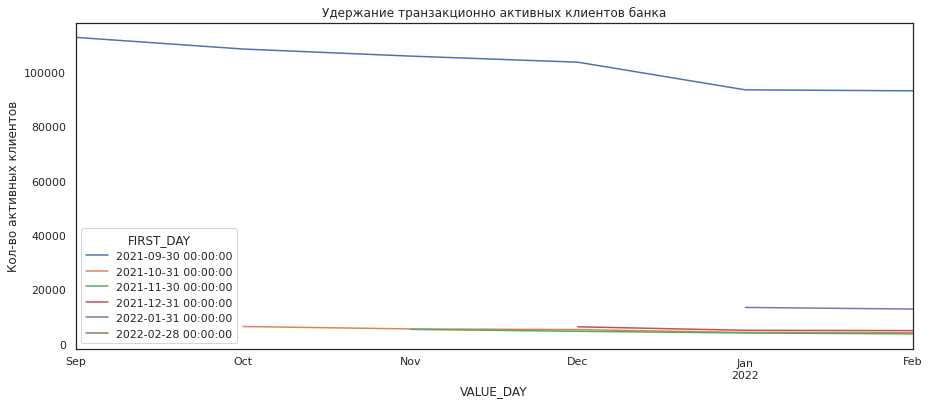

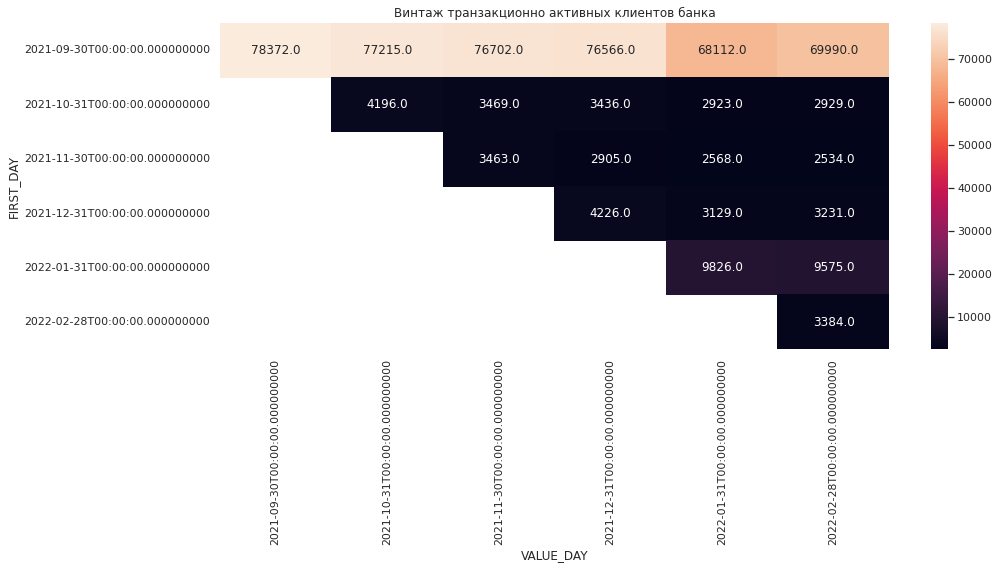

In [212]:
df_tnx = df1[['FIRST_DAY', 'VALUE_DAY', 'tnx_flg']]

cohort_pivot_tnx = df_tnx.pivot_table(index = 'VALUE_DAY',
                                     columns = 'FIRST_DAY',
                                     values = 'tnx_flg', aggfunc = 'sum')

cohort_pivot_dig.plot(figsize=(15, 6))
plt.title('Удержание транзакционно активных клиентов банка')
plt.ylabel('Кол-во активных клиентов');

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Винтаж транзакционно активных клиентов банка')
sns.heatmap(cohort_pivot_tnx.T, mask=cohort_pivot_tnx.T.isnull(), annot=True, fmt='0');

Глядя на эти графики видно, что база клиентов из когорты "09/22" сильно просидает

Это может быть по нескольким причинам:

1) Неактивные старые клиенты, активность которых со временем "засыпает"

2) Миграция на новую систему, а, как следствие, новые айдишники на тех же клиентах

3) Экономически-репутационные факторы на рынке



Предлагаю рассмотреть активацию мобильного приложения среди активных клиентов

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

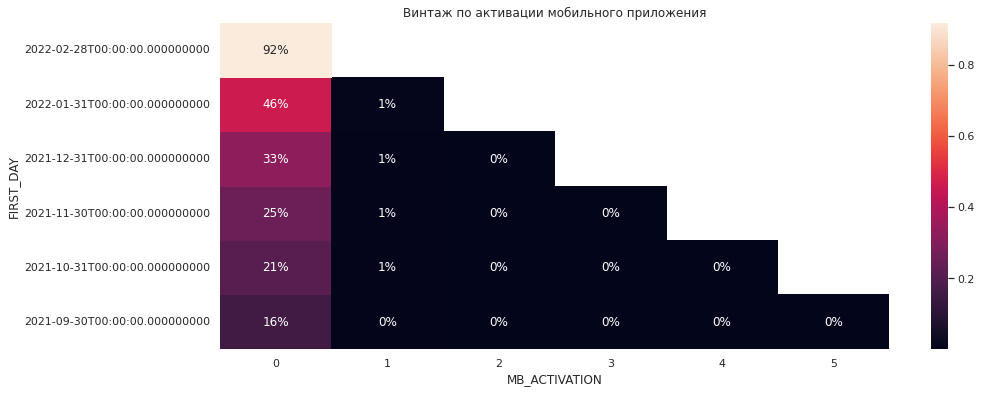

In [213]:
new_df = df1.loc[df1["dig_flg"] > 0]
new_df.loc[new_df.sort_values("VALUE_DAY").
groupby("CLIENT_ID").
apply(lambda x: x.index[0]), "mark"] = '1'
new_df1 = new_df[new_df['mark'] == '1'][['CLIENT_ID', 'VALUE_DAY']].rename(columns={'VALUE_DAY' : 'MB_ACTIVATION_DAY'})
new_df1 = df1.merge(new_df1, how = 'left', on = 'CLIENT_ID')
new_df1 = new_df1.loc[new_df1["MB_ACTIVATION_DAY"] == new_df1["VALUE_DAY"] ]
new_df1['MB_ACTIVATION'] = (new_df1['MB_ACTIVATION_DAY']-new_df1['FIRST_DAY']).dt.days // 28
new_df1 = new_df1[["FIRST_DAY","MB_ACTIVATION","dig_flg"]]
new_df1 = new_df1.groupby(["FIRST_DAY","MB_ACTIVATION"]).sum().reset_index()


new_df2 = df1[['FIRST_DAY', 'active_flg']]
new_df2 = new_df2.groupby(["FIRST_DAY"]).sum()
new_df1 = new_df1.merge(new_df2, how = 'left', on = 'FIRST_DAY')
new_df1["dol9"] = new_df1["dig_flg"]/new_df1["active_flg"]

new_df1 = new_df1[['FIRST_DAY', 'MB_ACTIVATION', 'dol9']]


cohort_pivot_MB_ACTIVATION = new_df1.pivot_table(index = 'MB_ACTIVATION',
                                     columns = 'FIRST_DAY',
                                     values = 'dol9', aggfunc = 'sum')

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Винтаж по активации мобильного приложения')
sns.heatmap(cohort_pivot_MB_ACTIVATION.T, mask=cohort_pivot_MB_ACTIVATION.T.isnull(), annot=True, fmt='0.0%').invert_yaxis();

Также выведем интересующую нас аналитику в таблицу:

In [214]:
new_df3 = df1[['VALUE_DAY', 'active_flg',"dig_flg","oper_flg","tnx_flg"]]
new_df3 = new_df3.groupby(["VALUE_DAY"]).sum()

new_df4 = df1.loc[df1["FIRST_DAY"] == df1["VALUE_DAY"] ]
new_df4 = new_df4[['VALUE_DAY', 'active_flg']].rename(columns={'active_flg' : 'new_active_flg'})
new_df4 = new_df4.groupby(["VALUE_DAY"]).sum()

new_df3 = new_df3.merge(new_df4, how = 'left', on = 'VALUE_DAY').reset_index()
new_df3 = new_df3.reindex(columns=['VALUE_DAY', 'active_flg', 'new_active_flg', 'dig_flg', 'oper_flg', 'tnx_flg'])
new_df4 = new_df3.rename(columns={'VALUE_DAY' : 'Отчетная дата','new_active_flg' : 'Новые клиенты','active_flg' : 'Портфель клиентов','dig_flg' : 'Диджитал активные клиенты','oper_flg' : 'Операционно активные клиенты','tnx_flg' : 'Транзакционно активные клиенты'})
new_df4


,Отчетная дата,Портфель клиентов,Новые клиенты,Диджитал активные клиенты,Операционно активные клиенты,Транзакционно активные клиенты
0,2021-09-30,129232,129232,112885,85414,78372
1,2021-10-31,131637,7044,114998,88108,81411
2,2021-11-30,133009,5841,116863,91616,83634
3,2021-12-31,135957,6875,119976,97769,87133
4,2022-01-31,136771,14770,120267,95749,86558
5,2022-02-28,139215,5330,123690,100290,91643


И сделаем воронку

In [215]:
new_df5 = new_df3 
new_df5["dol91"] = new_df5["dig_flg"]/new_df5["active_flg"]
new_df5["dol92"] = new_df5["oper_flg"]/new_df5["active_flg"]
new_df5["dol93"] = new_df5["tnx_flg"]/new_df5["active_flg"]

new_df5 = new_df5[["VALUE_DAY", "active_flg", "dol91", "dol92", "dol93"]]
new_df5 = new_df5.rename(columns={'VALUE_DAY' : 'Отчетная дата','active_flg' : 'Портфель клиентов','dol91' : 'Доля диджитал активных клиентов','dol92' : 'Доля операционно активных клиентов','dol93' : 'Доля транзакционно активных клиентов'})
new_df5

,Отчетная дата,Портфель клиентов,Доля диджитал активных клиентов,Доля операционно активных клиентов,Доля транзакционно активных клиентов
0,2021-09-30,129232,0.873507,0.660935,0.606444
1,2021-10-31,131637,0.873599,0.669325,0.618451
2,2021-11-30,133009,0.878610,0.688795,0.628785
3,2021-12-31,135957,0.882455,0.719117,0.640886
4,2022-01-31,136771,0.879331,0.700068,0.632868
5,2022-02-28,139215,0.888482,0.720397,0.658284


По данным диаграммам и таблицам можно сделать следующие выводы:



1.   Новые клиенты активнее подключают и пользуются мобильным приложением. Необходимо проработать базу "старых" клиентов и завлечь их в МБ
2.   Стало привлекаться меньше новых клиентов. Тут делать выводы пока рано, поскольку был всплеск в январе 2022. После 2-3 месяцев можно будет уже бить тревогу. Но стоит начать думать над тем, чтобы привлекать больше клиентов в портфель
3.   Проникновение в диджитал активных клиентов стало менее активным. Этот пункт будет рассмотрен ниже
4.   Есть провал по диджитал/операционно/транзакционно активным клиентам. В первую очередь это связано с рекордным числом новых клиентов







# **Проникновение транзакционно активных клиентов в когорты диджитал активных клиентов**

Теперь рассмотрим проникновение транзакционно активных клиентов в когорты диджитал активных клиентов. Для этого построим следующую диаграмму:

In [216]:
df2 = df1.loc[df1["dig_flg"] == 1][["VALUE_DAY","dig_flg","tnx_flg"]]
df2["nontnx_flg"] = df2["dig_flg"] - df2["tnx_flg"]

df3 = df2.groupby(["VALUE_DAY"]).sum()
df3['dol9'] =df3["nontnx_flg"]/df3["dig_flg"]

df4 = df3.drop(columns = "dig_flg")
df4

,tnx_flg,nontnx_flg,dol9
VALUE_DAY,,,
2021-09-30,78011,34874,0.308934
2021-10-31,81023,33975,0.295440
2021-11-30,83262,33601,0.287525
2021-12-31,86736,33240,0.277055
2022-01-31,86145,34122,0.283719
2022-02-28,91208,32482,0.262608


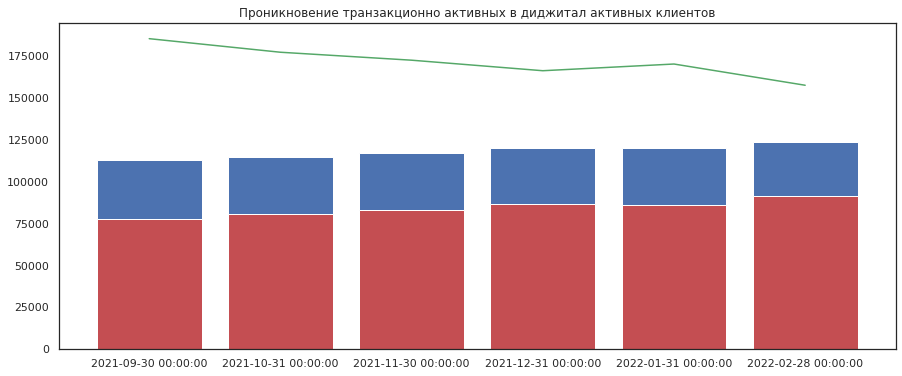

In [217]:
df5 = df4.reset_index()
series1 = df5["tnx_flg"]
series2 = df5["nontnx_flg"]
series3 = df5["dol9"]*600000

index = np.arange(6)
plt.figure(figsize=(15,6))
plt.title('Проникновение транзакционно активных в диджитал активных клиентов')
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)
plt.plot(index,series3,color='g')
plt.xticks(index,df5["VALUE_DAY"])
plt.show()


С графика видим, что 30-35% клиентов используют мобильное приложение, но не совершают транзакции. Есть несколько предположений, почему так может быть:

1) Клиенты завели депозит в банке, но не транзачат. Чтобы проверить эту гипотезу, нужно построить проникновение таких нетранзачащих клиентов в клиентов с депозитом. Если это окажется правдой, то можно было бы сделать предложение, согласно которому будут более привлекательные ставки по депозитам

2) Клиенты завели брокерский счет, но не транзачат. Чтобы проверить эту гипотезу, нужно построить проникновение таких нетранзачащих клиентов в клиентов с брокерским счетом. Если это окажется правдой, то можно было бы сделать предложение, согласно которому будут более привлекательные комиссии по каждой сделке у партнера

3) В данном пункте отмечу, что важно понимание методики подсчета поля "TRAN_ACTIVE_30_CNT". Если за транзакцию считается перевод или платеж, где текущий клиент является только плательщиком, то можно будет сделать вывод, что часть клиентов используют банк только в качестве получателя. Это могут быть пособия, алименты, стипендии... Для такой группы клиентов необходимо сделать предложение социального характера. Например, скидка на проезд в общественном транспорте

4) Стоит проанализировать, у каждого ли такого клиента есть расчетный счет. Если нет, то понятно, почему не происходит операций. В таком случае необходимо сформировать предложение клиенту по открытию и обслуживанию р/с

При первичном анализе видим, что доля транзакционно неактивных среди диджитл активных клиентов со временем снижается. В январе 2022 есть выброс, это связанно с сезонностью + притоком клиентов. Ничего особо отсюда заметить не получается. Теперь предлагается рассмотреть по когортам нетранзачащих диджитал клиентов:

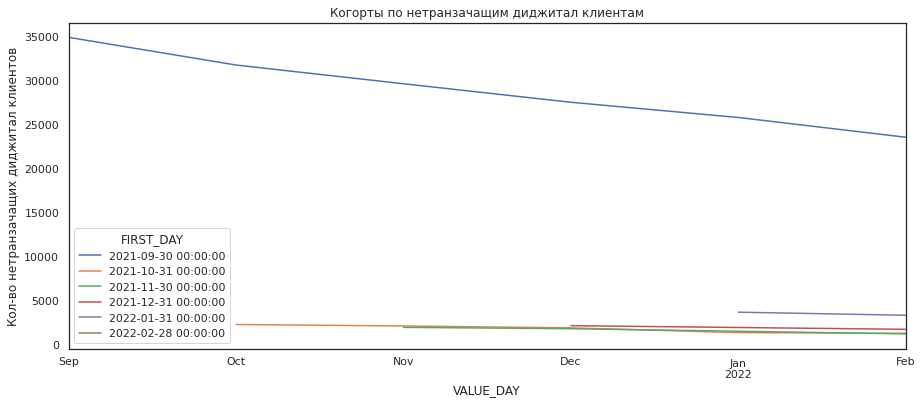

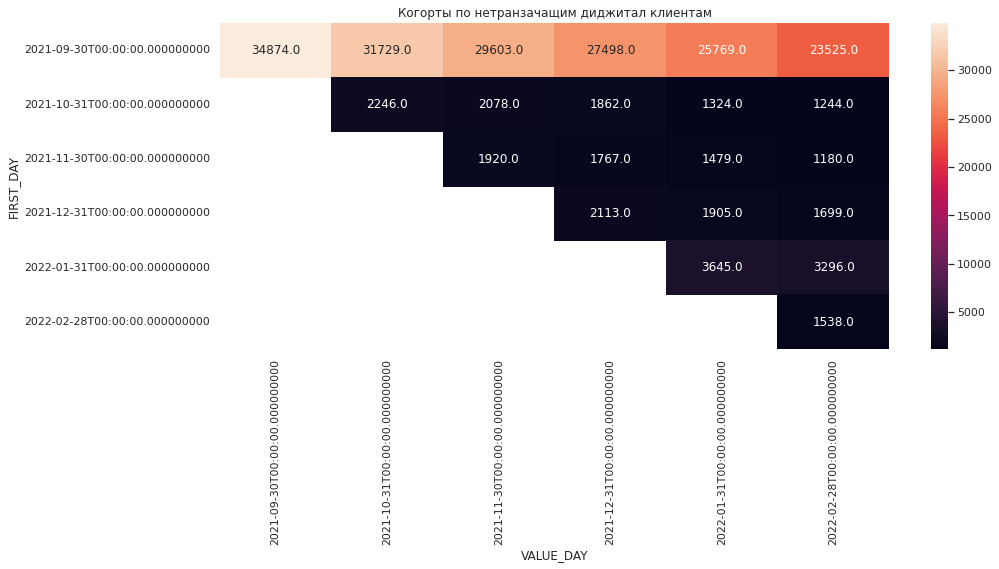

In [218]:
df_dig_nontnx = df1
df_dig_nontnx["dig_nontnx_flg"] = df1["tnx_flg"] + df1["dig_flg"]

df_dig_nontnx = df_dig_nontnx.loc[df1["dig_flg"] == 1]
df_dig_nontnx = df_dig_nontnx.loc[df1["dig_nontnx_flg"] == 1]
df_dig_nontnx = df_dig_nontnx[['FIRST_DAY', 'VALUE_DAY', 'dig_nontnx_flg']]

cohort_pivot_dig_nontnx = df_dig_nontnx.pivot_table(index = 'VALUE_DAY',
                                     columns = 'FIRST_DAY',
                                     values = 'dig_nontnx_flg', aggfunc = 'sum')

cohort_pivot_dig_nontnx.plot(figsize=(15, 6))
plt.title('Когорты по нетранзачащим диджитал клиентам')
plt.ylabel('Кол-во нетранзачащих диджитал клиентов');

sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Когорты по нетранзачащим диджитал клиентам')
sns.heatmap(cohort_pivot_dig_nontnx.T, mask=cohort_pivot_dig_nontnx.T.isnull(), annot=True, fmt='0');

По когортам можно увидеть, что со временем клиенты "дозревают" и начинают проводить транзакции

Стоит отметить, что большая часть клиентов, которые диджитал активные, но не транзачат- это клиенты первой когорты. Их "дозревание" имеет наибольший вклад в уменьшение доли таких клиетов в портфеле

# **Вывод:**

Прежде, чем что-то менять, необходимо понимать, какой показатель необходимо улучшить. 

1) Если таким показателем является **доля активных с транзакциями клиентов**, стоит четко определять, что такое клиент в таблице данных:

>##### **Это клиент банка:**

> a) В таком случае, возможно, стоит задуматься над тем, чтобы таким клиентам закрывать счета. Как следствие, такие клиенты не будут отображаться в данной статистике.

> b) Также не стоит забывать, что есть клиенты, которые транзачат, но не используют мобильное приложение. По результату ниже можно увидеть, что таких практически не оказалось, но стоит иметь этот метод в виду



In [219]:
df_txn_hot = df1.loc[df1["tnx_flg"] == 1][["VALUE_DAY","dig_flg","tnx_flg"]]
df_txn_hot["nondig_flg"] = df_txn_hot["tnx_flg"] - df_txn_hot["dig_flg"]

df_txn_hot = df_txn_hot.groupby(["VALUE_DAY"]).sum()
df_txn_hot['dol9'] =df_txn_hot["nondig_flg"]/df_txn_hot["tnx_flg"]

df_txn_hot = df_txn_hot.drop(columns = "tnx_flg")
df_txn_hot

,dig_flg,nondig_flg,dol9
VALUE_DAY,,,
2021-09-30,78011,361,0.004606
2021-10-31,81023,388,0.004766
2021-11-30,83262,372,0.004448
2021-12-31,86736,397,0.004556
2022-01-31,86145,413,0.004771
2022-02-28,91208,435,0.004747


> c) Необходимо также рассмотреть диджитал и операционно активных клиентов, которые не транзачат. Такие клиенты совершают нефинансовые операции. По структуре таких операций можно провести CRM-кампанию. Кол-во таких клиентов можно увидеть ниже

In [220]:
df_oper_hot = df1.loc[df1["tnx_flg"] == 1].loc[df1["oper_flg"] == 1][["VALUE_DAY","dig_flg","tnx_flg"]]
df_oper_hot["nondig_flg"] = df_oper_hot["tnx_flg"] - df_oper_hot["dig_flg"]

df_oper_hot = df_oper_hot.groupby(["VALUE_DAY"]).sum()
df_oper_hot['dol9'] =df_oper_hot["nondig_flg"]/df_oper_hot["tnx_flg"]

df_oper_hot = df_oper_hot.drop(columns = "tnx_flg")
df_oper_hot

,dig_flg,nondig_flg,dol9
VALUE_DAY,,,
2021-09-30,78011,361,0.004606
2021-10-31,81023,388,0.004766
2021-11-30,83262,372,0.004448
2021-12-31,86736,397,0.004556
2022-01-31,86145,413,0.004771
2022-02-28,91208,435,0.004747


>##### **Это может быть и клиент, и не клиент банка.** 


> a) В таком случае необходимо выделить не клиентов банка и провести CRM-кампанию

2) Если интересующим нас показателем является **кол-во активных транзачащих клиентов**, то можно сделать следующее:

> a) Наращивать базу клиентов, которые используют мобильное приложение. Кол-во активных транзачащих клиентов, которые не пользуются мобильным приложением можно видеть ниже. Их также не много, но стоит с ними поработать в рамках CRM-кампанию

In [221]:
df_act_hot = df1.loc[df1["tnx_flg"] == 1].loc[df1["active_flg"] == 1][["VALUE_DAY","dig_flg","active_flg"]]
df_act_hot["nondig_flg"] = df_act_hot["active_flg"] - df_act_hot["dig_flg"]

df_act_hot = df_act_hot.groupby(["VALUE_DAY"]).sum()
df_act_hot['dol9'] =df_act_hot["nondig_flg"]/df_act_hot["active_flg"]

df_act_hot = df_act_hot.drop(columns = "active_flg")
df_act_hot

,dig_flg,nondig_flg,dol9
VALUE_DAY,,,
2021-09-30,78011,361,0.004606
2021-10-31,81023,388,0.004766
2021-11-30,83262,372,0.004448
2021-12-31,86736,397,0.004556
2022-01-31,86145,413,0.004771
2022-02-28,91208,435,0.004747


3) Для улучшения показателей обеих метрик полезно провести следующую аналитику:

> a) Клиенты завели депозит в банке, но не транзачат. Чтобы проверить эту гипотезу, нужно построить проникновение таких нетранзачащих клиентов в клиентов с депозитом. Если это окажется правдой, то можно было бы сделать предложение, согласно которому будут более привлекательные ставки по депозитам

> b) Клиенты завели брокерский счет, но не транзачат. Чтобы проверить эту гипотезу, нужно построить проникновение таких нетранзачащих клиентов в клиентов с брокерским счетом. Если это окажется правдой, то можно было бы сделать предложение, согласно которому будут более привлекательные комиссии по каждой сделке у партнера

> c) В данном пункте отмечу, что важно понимание методики подсчета поля "TRAN_ACTIVE_30_CNT". Если за транзакцию считается перевод или платеж, где текущий клиент является только плательщиком, то можно будет сделать вывод, что часть клиентов используют банк только в качестве получателя. Это могут быть пособия, алименты, стипендии... Для такой группы клиентов необходимо сделать предложение социального характера. Например, скидка на проезд в общественном транспорте

> d) Стоит проанализировать, у каждого ли такого клиента есть расчетный счет. Если нет, то понятно, почему не происходит операций. В таком случае необходимо сформировать предложение клиенту по открытию и обслуживанию р/с

> e) Также стоит не забывать про эффект "дозревания" клиентов, о котором говорилось ранее. Он имеет наибольший вклад в уменьшение доли таких клиетов в портфеле